<a href="https://colab.research.google.com/github/alokproc/10-steps-to-become-a-data-scientist/blob/master/Celeb_GAN_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
!pip install tensorflow-gpu==2.0.0-beta1

In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'2.0.0-beta1'

In [0]:
# To generate GIFs
!pip install imageio

In [0]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [0]:
!git clone https://github.com/Saatwik-M/Celeb_Dataset

fatal: destination path 'Celeb_Dataset' already exists and is not an empty directory.


In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('Celeb_Dataset/list_attr_celeba.csv')

In [0]:
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [0]:
image_id = np.asarray(df[(df['Male']==-1)&(df['Attractive']==1)&(df['Young']==1)
                         &(df['Smiling']==1)&(df['Heavy_Makeup']==-1)&(df['Eyeglasses']==-1)
                        &(df['Chubby']==-1)&(df['Blurry']==-1)&(df['Bald']==-1)
                        &(df['Goatee']==-1)&(df['Mustache']==-1)&(df['No_Beard']==1)
                        &(df['5_o_Clock_Shadow']==-1)&(df['Bags_Under_Eyes']==-1)&(df['Double_Chin']==-1)
                        &(df['Receding_Hairline']==-1)&(df['Wearing_Earrings']==-1)&(df['Wearing_Hat']==-1)
                        &(df['Wearing_Necklace']==-1)&(df['Wearing_Necktie']==-1)]['image_id'])

In [0]:
image_id.shape

(2721,)

In [0]:
import matplotlib.image as mpimg
import cv2

In [0]:
#X = np.array(list(map(lambda image: cv2.cvtColor(cv2.resize(mpimg.imread('Celeb_Dataset/img_align_celeba/' + image), (80, 96)), cv2.COLOR_RGB2GRAY), image_id)))
X = np.array(list(map(lambda image: cv2.resize(mpimg.imread('Celeb_Dataset/img_align_celeba/' + image), (128, 160)), image_id)))

In [0]:
X.shape

(2721, 160, 128, 3)

In [0]:
X.dtype

dtype('uint8')

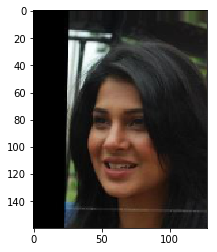

In [0]:
plt.imshow(X[np.random.randint(0,2721)])

In [0]:
X = (X - 127.5) / 127.5

In [0]:
X.shape

(2721, 160, 128, 3)

In [0]:
X.dtype

dtype('float64')

W0704 09:48:16.579700 140424460638080 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


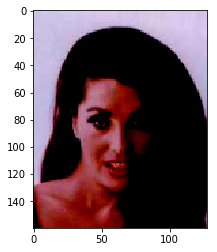

In [0]:
plt.imshow(X[0])

In [0]:
X = np.float32(X)

In [0]:
X.shape

(2721, 160, 128, 3)

In [0]:
X.dtype

dtype('float32')

W0704 09:48:18.899275 140424460638080 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


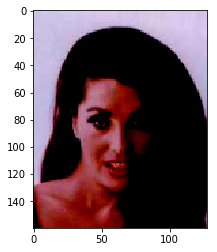

In [0]:
plt.imshow(X[0])

In [0]:
BUFFER_SIZE = 2721
BATCH_SIZE = 64

In [0]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(X).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [0]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(10*8*128, use_bias=False, input_shape=(100,)))

    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((10, 8, 128)))
#    assert model.output_shape == (None, 14, 12, 256) # Note: None is the batch size
    
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
#    assert model.output_shape == (None, 14, 12, 256)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
#    assert model.output_shape == (None, 28, 23, 256)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
#    assert model.output_shape == (None, 55, 44, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
#    assert model.output_shape == (None, 109, 89, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
#    assert model.output_shape == (None, 218, 178, 3)
#    model.add(layers.Reshape((218, 178, 3)))

    print(model.summary())
    return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10240)             1024000   
_________________________________________________________________
batch_normalization (BatchNo (None, 10240)             40960     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 10240)             0         
_________________________________________________________________
reshape (Reshape)            (None, 10, 8, 128)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 10, 8, 128)        409600    
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 8, 128)        512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 10, 8, 128)        0

W0704 09:48:23.823263 140424460638080 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


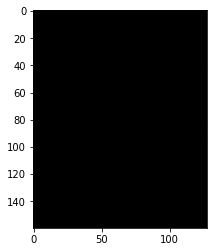

In [0]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, :])

In [0]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[160, 128, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    print(model.summary())
    return model

In [0]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 64, 64)        4864      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 80, 64, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 80, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 32, 128)       204928    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 40, 32, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 16, 256)      

In [0]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [0]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [0]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [0]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [0]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [0]:
os.mkdir('training_checkpoints')

FileExistsError: ignored

In [0]:
EPOCHS = 100
noise_dim = 100
num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [0]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [0]:
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for image_batch in dataset:
            train_step(image_batch)
 
    # Produce images for the GIF as we go
        display.clear_output(wait=True)
        generate_and_save_images(generator,
                                 epoch + 1,
                                 seed)

    # Save the model every 15 epochs
        if (epoch + 1) % 15 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)

        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epochs,
                             seed)

In [0]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(12,12))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(tf.cast(predictions[i, :, :, :] * 127.5 + 127.5,  tf.int32))
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [0]:
%%time
train(train_dataset, EPOCHS)

KeyboardInterrupt: ignored

In [0]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

NameError: ignored

In [0]:
tf.train.latest_checkpoint(checkpoint_dir)

'./training_checkpoints/ckpt-59'

In [0]:
# Display a single image using the epoch number
def display_image(epoch_no):
    return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

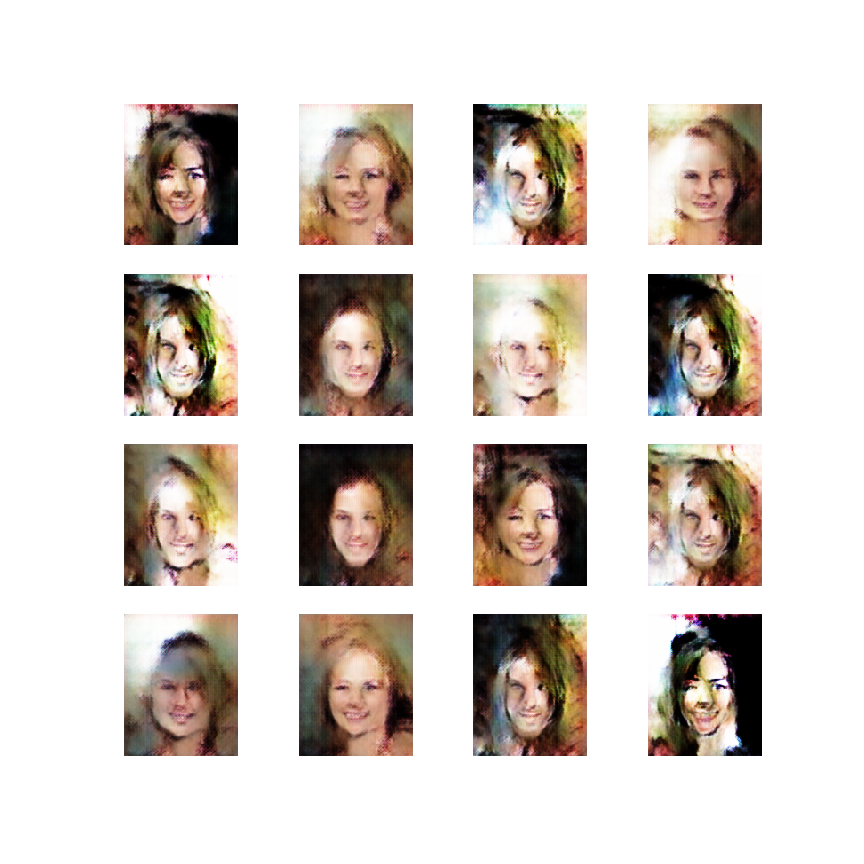

In [0]:
display_image(196)

In [0]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('image*.png')
    filenames = sorted(filenames)
    last = -1
    for i,filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)
    for x in range(50):
        writer.append_data(image)

import IPython
if IPython.version_info > (6,2,0,''):
    display.Image(filename=anim_file)

If you're working in Colab you can download the animation with the code below:

In [0]:
try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download(anim_file)

KeyboardInterrupt: ignored

In [0]:
pred = generator(tf.random.normal([16, noise_dim]), training=False)
fig = plt.figure(figsize=(12,12))

for i in range(pred.shape[0]):
    plt.subplot(4, 4, i+1)
    plt.imshow(pred[i, :, :, 0] * 127.5 + 127.5)
    plt.axis('off')

In [0]:
for i in range(100,197):
    os.remove("image_at_epoch_0" + str(i)+'.png')